25 [-0.09645972 -0.69532895]
27 [0.99232625 0.64554368]


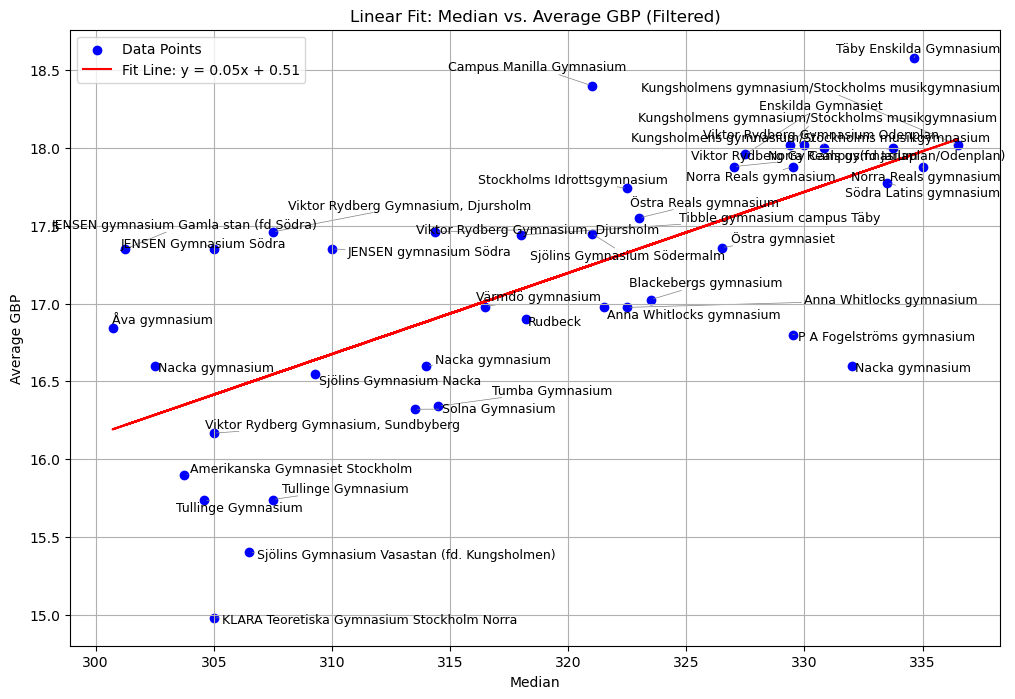

Slope: 0.05
Intercept: 0.51
R-squared: 0.47


In [349]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from adjustText import adjust_text  # Import the adjustText library

# Filter the data: remove rows where Median > 340
filtered_data = final_df[["Median", "Average GBP"]].copy()
filtered_data["School"] = final_df.index  # Add school names from index
filtered_data = filtered_data.dropna()  # Drop rows with NaN values

# Ensure "Median" and "Average GBP" columns are numeric
filtered_data["Median"] = pd.to_numeric(filtered_data["Median"], errors="coerce")
filtered_data["Average GBP"] = pd.to_numeric(filtered_data["Average GBP"], errors="coerce")
filtered_data = filtered_data.dropna()  # Drop rows where conversion to numeric failed
filtered_data = filtered_data[filtered_data["Median"] <= 340]  # Filter out Median > 340

# Convert columns to numpy arrays
x = filtered_data["Median"].values
y = filtered_data["Average GBP"].values
schools = filtered_data["School"].values  # Get school names for annotation

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept  # Calculate the fitted line

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color="blue", label="Data Points")  # Scatter plot of data points
plt.plot(x, line, color="red", label=f"Fit Line: y = {slope:.2f}x + {intercept:.2f}")  # Fitted line
plt.title("Linear Fit: Median vs. Average GBP (Filtered)")  # Title of the plot
plt.xlabel("Median")  # Label for the x-axis
plt.ylabel("Average GBP")  # Label for the y-axis

# Annotate each data point with the school name
texts = []
for i, school in enumerate(schools):
    texts.append(plt.text(x[i], y[i], school, fontsize=9))  # Add text to the plot

# Adjust the annotations to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))

plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid lines for better readability
plt.show()  # Display the plot

# Print the linear regression statistics
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
